Diego Lozoya Morales | 745345

09/11/23

# Actividad - Ecuaciones diferenciales

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp, odeint

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [7]:
def f(t, x):
    return x / (t+1)

tspan = [0, 20]
x0 = np.array([0.123456789])

x = solve_ivp(f, tspan, x0, max_step=0.1)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.990e+01  2.000e+01]
        y: [[ 1.235e-01  1.358e-01 ...  2.580e+00  2.593e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1202
     njev: 0
      nlu: 0

Grafique con condición inicial $x_0 = 2$

In [5]:
def f(t, x):
    return x / (t+1)

tspan = [0, 20]
x0 = np.array([2])

x = solve_ivp(f, tspan, x0, max_step=0.1)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.990e+01  2.000e+01]
        y: [[ 2.000e+00  2.200e+00 ...  4.180e+01  4.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1202
     njev: 0
      nlu: 0

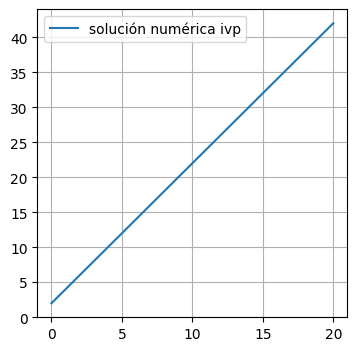

In [6]:
plt.figure(figsize=(4, 4))
plt.plot(x.t, x.y[0, :], label="solución numérica ivp")
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [36]:
w0 = 3

def dX(t, X) :
    # t es un escalar
    # X es un arreglo de dos elementos
    x = X[0]
    dx = X[1]
    d2x = -w0**2*x

    return [dx, d2x]

tspan = [0, 10]
x0 = np.array([0.5, 0.1])

x = solve_ivp(dX, tspan, x0, max_step=0.1)

Grafique

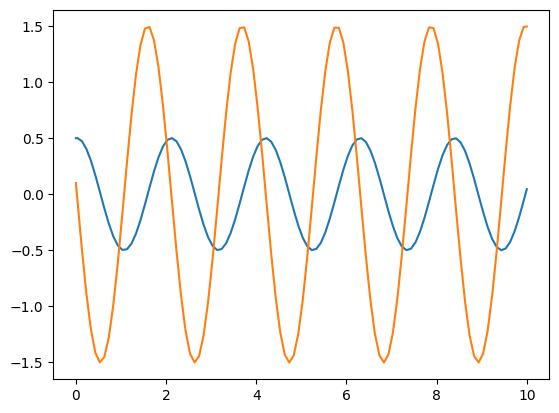

In [37]:
plt.figure()
plt.plot(x.t, x.y[0, :])
plt.plot(x.t, x.y[1, :])


Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [38]:
C1 = x0[0]
C2 = x0[1]/w0

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [39]:
def posicion(t):
    return C1*np.cos(w0*t) + C2*np.sin(w0*t)

def velocidad(t):
    return w0*(-C1*np.sin(w0*t) + C2*np.cos(w0*t))

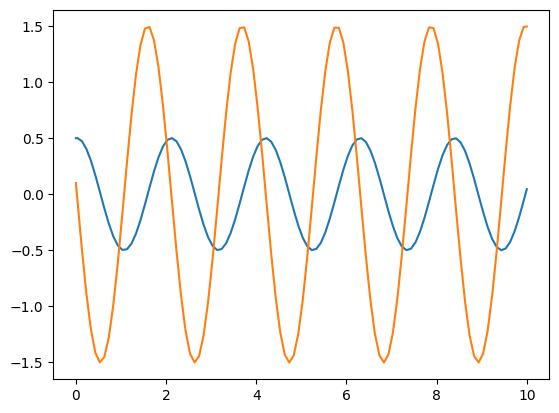

In [40]:
plt.figure()
plt.plot(x.t, x.y[0, :])
plt.plot(x.t, x.y[1, :])

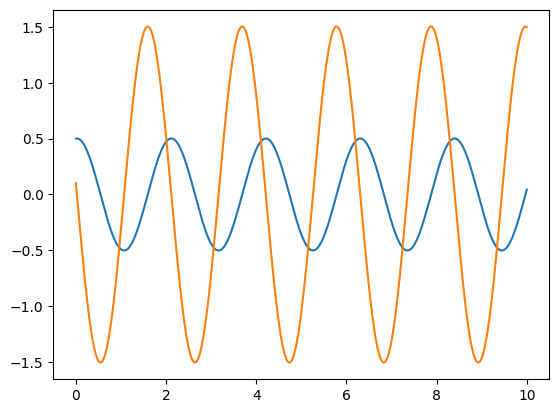

In [48]:
t = np.linspace(0, 10, 1000)
plt.figure()
plt.plot(t, posicion(t))
plt.plot(t, velocidad(t))